In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.fftpack
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

In [2]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return np.round(gray*255).astype(int)
img = rgb2gray(plt.imread("../../fleur.png"))

In [3]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )
def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [4]:
imsize = img.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( img[i:(i+8),j:(j+8)] )
dct = np.round(dct)

Text(0.5, 1.0, '8x8 DCTs of the image')

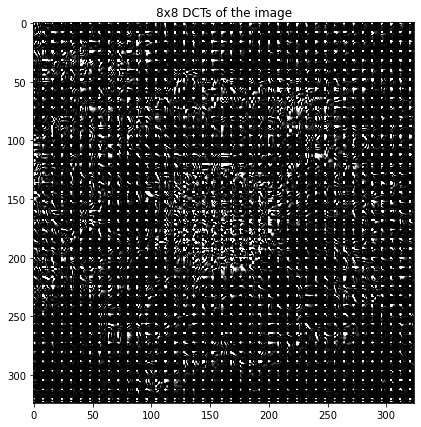

In [5]:
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

In [6]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, '8x8 DCTs of the image')

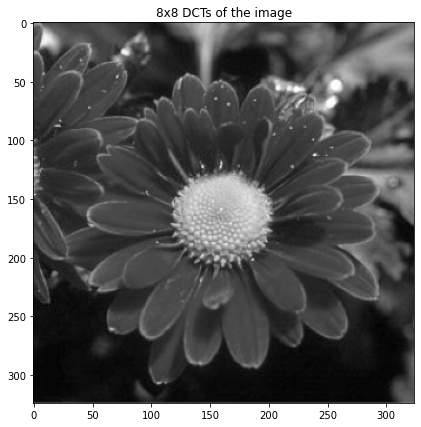

In [7]:
plt.figure()
plt.imshow(im_dct,cmap='gray')
plt.title( "8x8 DCTs of the image")

In [8]:
im_dct = im_dct

In [9]:
np.mean((img-im_dct)**2)

0.08274487219433661

In [10]:
im_dct

array([[129.4199272 , 112.5206889 , 112.76435894, ..., 125.94778285,
        126.31611875, 126.10710237],
       [150.7146898 , 134.43627216, 133.58060693, ..., 122.51205275,
        122.28921399, 126.22582158],
       [163.129434  , 144.90600451, 133.0162512 , ..., 126.44730011,
        128.98342449, 129.83973462],
       ...,
       [ 12.80080473,  12.72967923,  11.91837537, ...,  92.76079225,
         93.35274929,  88.59810317],
       [ 13.5194756 ,  12.82446445,  12.84043773, ...,  96.56146427,
         96.32499419,  93.93997129],
       [ 58.33539376,  57.96110191,  57.93996084, ..., 111.96779907,
        112.79438925, 111.68439919]])

In [11]:
img

array([[130, 113, 113, ..., 126, 126, 126],
       [151, 134, 134, ..., 123, 123, 126],
       [163, 145, 133, ..., 126, 129, 130],
       ...,
       [ 13,  13,  12, ...,  93,  93,  89],
       [ 13,  13,  13, ...,  96,  96,  94],
       [ 58,  58,  58, ..., 112, 113, 112]])

In [12]:
dct

array([[911., -21.,  47., ...,  -5.,  -1.,  -0.],
       [127.,  49., -33., ...,  -2.,   1.,  -1.],
       [-26.,   1., -63., ...,   1.,  -0.,  -0.],
       ...,
       [-88.,   4.,  -2., ...,   3.,  -1.,  -0.],
       [ 65.,  -0.,  -2., ...,  -1.,  -0.,  -1.],
       [-32.,  -1.,  -1., ...,   0.,   0.,  -1.]])

In [13]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift

In [14]:
fI = fft2(plt.imread("sample_1920×1280.bmp")) 

In [15]:
fI

array([[[482862.        +0.00000000e+00j,
          18729.        +3.98770057e+04j,
          18729.        -3.98770057e+04j],
        [ 55534.03892662+1.26356730e+04j,
           1957.01884502-4.82793766e+02j,
          11447.69282788-4.55203671e+03j],
        [ 16492.70518281-2.50921436e+03j,
           1744.16648792-1.14696860e+03j,
           5792.04423381-4.22831637e+01j],
        ...,
        [  9359.27661988+3.80000407e+03j,
           3504.27345689+2.03062020e+02j,
           1495.65027518+1.49873199e+03j],
        [ 16492.70518281+2.50921436e+03j,
           5792.04423381+4.22831637e+01j,
           1744.16648792+1.14696860e+03j],
        [ 55534.03892662-1.26356730e+04j,
          11447.69282788+4.55203671e+03j,
           1957.01884502+4.82793766e+02j]],

       [[485500.        +0.00000000e+00j,
          18692.5       +3.99384935e+04j,
          18692.5       -3.99384935e+04j],
        [ 56306.72817012+1.14759730e+04j,
           1904.24879345-4.50257280e+02j,
          11